**PRÁCTICA FINAL MACHINE LEARNING**

Nombres:

    -María Cifuentes Pascual.
    -Martina Díaz González.
    -Óscar Domínguez Figueros.
    -Carlota García Bonilla.
    -Óscar Guerrero Calle.
    -Jorge de Rosario Martínez.



In [1]:
# Importamos librerías

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy.stats as ss
import warnings
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
import funciones_auxiliares as f_aux

Hemos escogido un conjunto de datos acerca de accidentes automovilísticos en Canadá entre los años 1994 y 2014. Este conjunto de datos proporcionado por Transport Canada contiene datos de colisión para accidentes de automóvil en función de las características y condiciones en las que estos se hayan producido. 
Cada una de las variables que se utilizan para describir los accidentes se subdividen en diferentes categorías. 
Hay datos de los accidentes en base al momento del tiempo en que se hayan producido que son el año, el mes, el día de la semana y la hora del día. 
Los accidentes también se clasifican en base a otros criterios. Por ejemplo, si el resultado final del accidente ha sido que los que intervienen en él han muerto o no (C_SEV); el número de vehículos que intervienen en el accidente (C_VEHS); las condiciones climatológicas que había en el momento del accidente (C_WTHR); el tipo de vehículo que interviene (V_TYPE); el sexo y la edad de las personas involucradas en el accidente (P_SEX y P_AGE); el tipo de elementos de seguridad de los que disponían los individuos durante el accidente (P_SAFE); etc.

Cargamos y visualizamos los datos. 

In [2]:
df = pd.read_csv("NCDB_1999_to_2014.csv", sep = ',', na_values=["U", "UU", "UUUU", "X", "XX", "XXXX"])
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,1.0,06,1990,01,M,41,11,1,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,01,M,19,11,1,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,1.0,01,1986,01,M,46,11,1,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,99.0,NN,NNNN,01,M,05,99,2,NaN,3.0
5,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,1.0,01,1984,01,M,28,11,1,NaN,1.0
6,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,2.0,01,1991,01,M,21,11,1,NaN,1.0
7,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,2.0,01,1991,02,F,NaN,13,2,NaN,2.0
8,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,3.0,01,1992,01,M,NaN,11,2,NaN,1.0
9,1999,1.0,1.0,15.0,2,1.0,04,NaN,1,5,...,1.0,01,1997,01,M,61,11,1,NaN,1.0


Este conjunto de datos presenta 1942851 entradas para 22 variables.

In [3]:
df.shape

(5860405, 22)

Eliminamos las variables V_ID y P_ID porque los datos referidos a la identidad no influyen sobre las causas y tipos de accidentes.

In [4]:
df = df.drop('V_ID', axis = 1)
df = df.drop('P_ID', axis = 1)

Vemos cuales son las columnas de nuestro conjunto de datos, es decir, las variables.

In [5]:
variables = df.columns
variables

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR',
       'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

Vemos si hay datos missing en nuestro conjunto de datos.

In [6]:
df.isna()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,False,True,True,True,False,True,True,False,True,True,True,True,False,True,False,False,False,False,False,False
5860401,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5860402,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5860403,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


Calculamos la suma de datos missing en cada variable: 

In [7]:
df.isna().sum()

C_YEAR         0
C_MNTH       385
C_WDAY      1323
C_HOUR     59409
C_SEV          0
C_VEHS       544
C_CONF    179019
C_RCFG    504648
C_WTHR     87975
C_RSUR     78451
C_RALN    434710
C_TRAF    223483
V_TYPE     29754
V_YEAR    324122
P_SEX     234954
P_AGE     377140
P_PSN      57662
P_ISEV     80701
P_SAFE    615188
P_USER    175586
dtype: int64

Suma del total de datos missing en el conjunto de datos:

In [8]:
df.isna().sum().sum()

3465054

In [9]:
def NA(data):
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending = False)
    percent = (((null_sum / len(data.index))*100).round(2)).sort_values(ascending = False)
    df_NA = pd.concat([total, percent], axis=1, keys=['NA', '% NA'])
    return df_NA

In [10]:
NA(df)

,NA,% NA
P_SAFE,615188,10.50
C_RCFG,504648,8.61
C_RALN,434710,7.42
P_AGE,377140,6.44
V_YEAR,324122,5.53
P_SEX,234954,4.01
C_TRAF,223483,3.81
C_CONF,179019,3.05
P_USER,175586,3.00
C_WTHR,87975,1.50


Codificamos la variable 'P_SEX' manualmente. Distinguimos entre variables categóricas y continuas.

In [11]:
df['P_SEX'].unique()

array(['M', 'F', nan, 'N'], dtype=object)

In [12]:
df['P_SEX'] = df['P_SEX'].map({'F' : 0, 'M' : 1, 'N' : 'N'})

In [13]:
df['P_SEX'].unique()

array([1, 0, nan, 'N'], dtype=object)

En este dataset, la gran mayoría de variables son categóricas, sin embargo nosotros decidimos tratar las variables 'C_HOUR', 'C_VEHS' y 'P_AGE' como continuas.

In [14]:
var_cont = ['C_HOUR', 'C_VEHS', 'P_AGE']

In [15]:
df['P_AGE'].unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', 'NN', '91', '95', '97', '94', '99',
       '98', '96'], dtype=object)

In [16]:
df['C_HOUR'].unique()

array([20.,  8., 17., 15., 14.,  1., 11., 13., 19., 16.,  9.,  2., 18.,
       12., 10., 23.,  0.,  6.,  7., 21., nan,  5., 22.,  3.,  4.])

In [17]:
df['C_VEHS'].unique()

array([ 2.,  1.,  3.,  4.,  6.,  7.,  9., nan,  5., 13.,  8., 12., 14.,
       10., 11., 16., 26., 71., 19., 25., 21., 27., 15., 35., 22., 41.,
       46., 31., 18., 56., 23., 36., 17., 20., 29., 77., 28., 38., 32.,
       33., 54., 72., 40., 44., 58., 30., 24., 34., 39., 51., 57., 43.,
       37.])

Ahora vamos a proceder a codificar las variables e imputar los distintos valores que pueden tomar. Como ya hemos expuesto arriba, la gran mayoría de variables son de tipo categórico, tomando valores numéricos para cada categoría. Sin embargo las variables, tanto categóricas como continuas, pueden tomar los valores

    -U - Unknown
    -X - Jurisdiction not provide
    -Q - otro (categoría other)
    -N - not applicable (dummy)

En este caso, nosotros tratamos como missings los valores Unknown (U) y Jurisdiccion not provide (X), sin embargo hay otros dos de los posibles valores a tener en cuenta.

El valor Q hace regerencia other, es decir es un valor distinto al de las categorías principales de cada variable, que recoge los casos que no se repiten lo suficiente como para ser considerados como una categoría en sí mismos. Es por ello, que vamos a imputarlos asociandoles un valor aparte, como si fuera otra cagegória más.

Por otra parte, los valores N, son valores no aplicables. Esto quiere decir que son valores que 'no entran dentro de la categoría'. En la mayoría de los casos, los dummies (valores N en este dataset) hacen referencia a casos en los que había coches aparcados, o casos en los que no había nadie dentro de uno de los coches inmiscuidos en el accidente por lo que por ejemplo, no se podrían cosiderar víctimas mortales o no mortales si no hay personas que puedan resultar heridas. Es por ello que decidimos asociarles otro valor aparte tamb

Es por ello que decidimos asociarles a cada uno un valor concreto, el mismo tanto para variables continuas como categóricas. En caso de Q, el valor es 11111 y en caso de N el valor es el 33333.

En caso de las variables continuas, imputamos los missings de cada variable (recordamos que son los valores Q y N) con la mediana. 

In [18]:
def codificar_continuas(df, lista):
    listN = ['N', 'NN', 'NNNN'] #dummies
    listQ = ['Q', 'QQ'] #otra categoría más
    for variable in lista:
        for i in listN:
            df[variable] = df[variable].replace([i], 11111) #reemplazamos los valores N de cada variable con 11111
        for i in listQ:
            df[variable] = df[variable].replace([i], 33333) #reemplazamos los valores Q de cada variable con 33333
        df[variable] = df[variable].fillna(int(df[variable].median())) #rellenamos los misssings de cada variable con su mediana
        df[variable] = df[variable].apply(int) #convertimos a entero los valores

In [19]:
codificar_continuas(df, var_cont)

In [20]:
df['C_HOUR'].unique()

array([20,  8, 17, 15, 14,  1, 11, 13, 19, 16,  9,  2, 18, 12, 10, 23,  0,
        6,  7, 21,  5, 22,  3,  4], dtype=int64)

In [21]:
df['C_VEHS'].unique()

array([ 2,  1,  3,  4,  6,  7,  9,  5, 13,  8, 12, 14, 10, 11, 16, 26, 71,
       19, 25, 21, 27, 15, 35, 22, 41, 46, 31, 18, 56, 23, 36, 17, 20, 29,
       77, 28, 38, 32, 33, 54, 72, 40, 44, 58, 30, 24, 34, 39, 51, 57, 43,
       37], dtype=int64)

In [22]:
df['P_AGE'].unique()

array([   41,    19,    20,    46,     5,    28,    21,    34,    61,
          56,    22,    30,    49,    32,    31,    68,     8,    45,
          17,    33,    82,    39,    37,    55,    38,    43,    35,
          23,    25,    65,    44,    36,    70,    50,    40,    27,
          26,    15,    53,    16,    13,    14,    12,    18,    77,
          86,    42,    24,    47,    62,     6,    57,    83,    74,
          67,    51,    29,     1,     2,    54,    71,    10,    79,
          63,    58,    48,    60,     7,    64,    75,    52,    85,
          93,    92,    69,    72,    11,    59,     9,    66,    76,
          73,     4,    78,    80,    84,     3,    81,    89,    87,
          88,    90, 11111,    91,    95,    97,    94,    99,    98,
          96], dtype=int64)

In [23]:
df['P_AGE'].value_counts()

34    469307
18    171719
19    167721
20    158747
17    158163
       ...  
99       321
95       292
96       201
98       193
97       110
Name: P_AGE, Length: 100, dtype: int64

Agrupamos los datos en función de la variable P_AGE y el resto de las variables. Es decir, para las personas que lleven un año conduciendo, en el año que se esté considerando, habrán 11517 accidentes. 

In [24]:
df.groupby('P_AGE').count()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_PSN,P_ISEV,P_SAFE,P_USER
P_AGE,,,,,,,,,,,,,,,,,,,
1,39423,39422,39420,39423,39423,39423,38801,36158,39010,38992,36378,38560,39375,38697,39079,39222,39382,38195,39034
2,25371,25370,25368,25371,25371,25371,24865,22898,25030,25025,23029,24692,25335,24816,25306,25226,25340,24574,25071
3,25532,25531,25528,25532,25532,25532,25048,23206,25231,25234,23381,24837,25493,25042,25463,25400,25502,24633,25232
4,26407,26407,26401,26407,26407,26407,25891,24027,26096,26101,24201,25662,26365,25780,26324,26232,26387,25323,26038
5,26642,26642,26641,26642,26642,26642,26083,24159,26316,26338,24384,25941,26595,25929,26573,26482,26624,25467,26298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,201,201,201,201,201,201,192,190,199,198,192,187,201,199,199,200,201,192,197
97,110,110,110,110,110,110,107,106,107,109,107,105,110,107,108,109,110,101,109
98,193,193,193,193,193,193,186,179,191,191,189,181,192,181,189,190,190,162,184


Eliminamos los datos relativos al "11111".

In [25]:
df = df.drop(df[df['P_AGE'] == 11111].index)

In [26]:
df['P_AGE'].unique()

array([41, 19, 20, 46,  5, 28, 21, 34, 61, 56, 22, 30, 49, 32, 31, 68,  8,
       45, 17, 33, 82, 39, 37, 55, 38, 43, 35, 23, 25, 65, 44, 36, 70, 50,
       40, 27, 26, 15, 53, 16, 13, 14, 12, 18, 77, 86, 42, 24, 47, 62,  6,
       57, 83, 74, 67, 51, 29,  1,  2, 54, 71, 10, 79, 63, 58, 48, 60,  7,
       64, 75, 52, 85, 93, 92, 69, 72, 11, 59,  9, 66, 76, 73,  4, 78, 80,
       84,  3, 81, 89, 87, 88, 90, 91, 95, 97, 94, 99, 98, 96],
      dtype=int64)

Definimos ahora las variables categóricas, que serán todas las del dataset menos 'C_HOUR', 'C_VEHS' y 'P_AGE'. Como mencionamos anteriormente, casi todas las variables son de este tipo.

De esta manera tambien para las variables categóricas les asociamos los valores 11111 y 33333 a N (dummies) y Q (other) respectivamente. En caso de los missings, ahora los imputamos por la moda.

In [27]:
var_cat = list(variables)
for var in var_cont:
    var_cat.remove(var)
print(var_cat, '|', len(var_cat))

['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_SEV', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'] | 17


In [28]:
def codificar_categoricas(df, lista):
    listN = ['N', 'NN', 'NNNN'] #dummies
    listQ = ['Q', 'QQ'] #otra categoría más
    for variable in lista:
        for i in listN:
            df[variable] = df[variable].replace([i], 11111) #reemplazamos los valores N de cada variable con 11111
        for i in listQ:
            df[variable] = df[variable].replace([i], 33333) #reemplazamos los valores Q de cada variable con 33333
        df[variable] = df[variable].fillna(int(df[variable].mode())) #rellenamos los misssings de cada variable con su moda
        df[variable] = df[variable].apply(int) #convertimos a entero las categorías

In [29]:
codificar_categoricas(df, var_cat)

Creamos la variables antigüedad del vehículo haciendo la diferencia entre C_YEAR y V_YEAR. 
Después eliminamos las variables anteriores C_YEAR y V_YEAR. 

In [30]:
def V_ANT(df):
    df['V_ANT'] = df['C_YEAR'] - df['V_YEAR']
    for i in df['V_ANT']:
        if i < 0:
            df['V_ANT'] = df['V_ANT'].replace([i], 11111)

In [31]:
V_ANT(df)

In [32]:
df['V_ANT'].unique()

array([    9,    12,    13, 11111,    15,     8,     7,     2,     6,
          14,    11,     5,     4,     1,    10,     3,    16,     0,
          34,    22,    21,    31,    18,    20,    23,    27,    17,
          24,    26,    25,    19,    32,    29,    28,    37,    30,
          33,    54,    36,    39,    49,    35,    40,    44,    41,
          96,    90,    50,    76,    38,    85,    91,    46,    93,
          60,    74,    51,    61,    92,    47,    95,    82,    87,
          55,    43,    69,    68,    48,    53,    52,    42,    45,
          56,    98,    62,    94,    64,    73,    58,    67,    79,
          66,    80,    84,    70,    71,    83,    86,    75,    59,
          65,    63,    77,    72,    81,    57,   100,    99,   101,
          78,    89,    97,    88,   103], dtype=int64)

In [33]:
df = df.drop('V_YEAR', axis = 1)
df = df.drop('C_YEAR', axis = 1)

In [34]:
# Ahora las N y las Q toman los valores 11111 y 33333. Cuando las metamos al label encoder se codificarán.

In [35]:
df.groupby('V_ANT').count()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
V_ANT,,,,,,,,,,,,,,,,,,
0,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413
1,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312
2,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543
3,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303
4,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
100,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
101,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [36]:
# Hay muchas con valor dummy o other. Parece que las N son para los peatones, reemplazamos este valor por 0.

In [37]:
df['V_ANT'] = df['V_ANT'].replace([11111], 0)

In [38]:
df['V_ANT'].unique()

array([  9,  12,  13,   0,  15,   8,   7,   2,   6,  14,  11,   5,   4,
         1,  10,   3,  16,  34,  22,  21,  31,  18,  20,  23,  27,  17,
        24,  26,  25,  19,  32,  29,  28,  37,  30,  33,  54,  36,  39,
        49,  35,  40,  44,  41,  96,  90,  50,  76,  38,  85,  91,  46,
        93,  60,  74,  51,  61,  92,  47,  95,  82,  87,  55,  43,  69,
        68,  48,  53,  52,  42,  45,  56,  98,  62,  94,  64,  73,  58,
        67,  79,  66,  80,  84,  70,  71,  83,  86,  75,  59,  65,  63,
        77,  72,  81,  57, 100,  99, 101,  78,  89,  97,  88, 103],
      dtype=int64)

In [39]:
NA(df)

,NA,% NA
C_MNTH,0,0.0
C_TRAF,0,0.0
P_USER,0,0.0
P_SAFE,0,0.0
P_ISEV,0,0.0
P_PSN,0,0.0
P_AGE,0,0.0
P_SEX,0,0.0
V_TYPE,0,0.0
C_RALN,0,0.0


Observamos que ya no aparece ningún dato missing.

Actualizamos las listas de "var_cont" y "var_cat".

In [40]:
var_cont = ['C_HOUR', 'C_VEHS', 'P_AGE', 'V_ANT'] #Ya todas preparadas
var_cont

['C_HOUR', 'C_VEHS', 'P_AGE', 'V_ANT']

In [41]:
variables = list(df.columns)
var_cat = list(variables)
for var in var_cont:
    var_cat.remove(var)
print(var_cat, '|', len(var_cat))


['C_MNTH', 'C_WDAY', 'C_SEV', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'] | 15


In [42]:
for variable in list(df.columns): 
    print('--------------------------------------------')
    print('Variable: ', variable, '|', 'Type: ', df[variable].dtype)
    print(df[variable].value_counts())
    print('--------------------------------------------')

--------------------------------------------
Variable:  C_MNTH | Type:  int64
8     545543
7     535976
12    524131
6     518444
10    514209
9     511215
1     498580
11    497592
5     466907
2     422022
3     416381
4     391389
Name: C_MNTH, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_WDAY | Type:  int64
5    998175
4    867045
6    864217
3    823020
2    814021
1    773552
7    702359
Name: C_WDAY, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_HOUR | Type:  int64
16    518276
17    499149
15    491563
14    455421
18    375057
12    367204
13    366357
8     302036
11    301151
19    280812
10    248301
9     227044
20    216563
7     207505
21    203605
22    164224
23    127066
6     105810
0      87836
2      76846
1      72779
3      63566
5      44713
4      39505
Name: C_HOUR, dtype: int64
-------------------------------------------

Codificación de las variables categóricas mediante el Label Encoder. Este método identifica los dintintos valores (clases) de cada variable y sustituye cada uno de ellos por un número. 

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for variable in var_cat:
    df[variable] = le.fit_transform(df[variable])

In [44]:
for variable in list(df.columns): 
    print('--------------------------------------------')
    print('Variable: ', variable, '|', 'Type: ', df[variable].dtype)
    print(df[variable].value_counts())
    print('--------------------------------------------')

--------------------------------------------
Variable:  C_MNTH | Type:  int64
7     545543
6     535976
11    524131
5     518444
9     514209
8     511215
0     498580
10    497592
4     466907
1     422022
2     416381
3     391389
Name: C_MNTH, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_WDAY | Type:  int64
4    998175
3    867045
5    864217
2    823020
1    814021
0    773552
6    702359
Name: C_WDAY, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_HOUR | Type:  int64
16    518276
17    499149
15    491563
14    455421
18    375057
12    367204
13    366357
8     302036
11    301151
19    280812
10    248301
9     227044
20    216563
7     207505
21    203605
22    164224
23    127066
6     105810
0      87836
2      76846
1      72779
3      63566
5      44713
4      39505
Name: C_HOUR, dtype: int64
-------------------------------------------

# ANÁLISIS DESCRIPTIVO

Histogramas de todas las variables para ver su distribución:

array([[<AxesSubplot:title={'center':'C_MNTH'}>,
        <AxesSubplot:title={'center':'C_WDAY'}>,
        <AxesSubplot:title={'center':'C_HOUR'}>,
        <AxesSubplot:title={'center':'C_SEV'}>],
       [<AxesSubplot:title={'center':'C_VEHS'}>,
        <AxesSubplot:title={'center':'C_CONF'}>,
        <AxesSubplot:title={'center':'C_RCFG'}>,
        <AxesSubplot:title={'center':'C_WTHR'}>],
       [<AxesSubplot:title={'center':'C_RSUR'}>,
        <AxesSubplot:title={'center':'C_RALN'}>,
        <AxesSubplot:title={'center':'C_TRAF'}>,
        <AxesSubplot:title={'center':'V_TYPE'}>],
       [<AxesSubplot:title={'center':'P_SEX'}>,
        <AxesSubplot:title={'center':'P_AGE'}>,
        <AxesSubplot:title={'center':'P_PSN'}>,
        <AxesSubplot:title={'center':'P_ISEV'}>],
       [<AxesSubplot:title={'center':'P_SAFE'}>,
        <AxesSubplot:title={'center':'P_USER'}>,
        <AxesSubplot:title={'center':'V_ANT'}>, <AxesSubplot:>]],
      dtype=object)

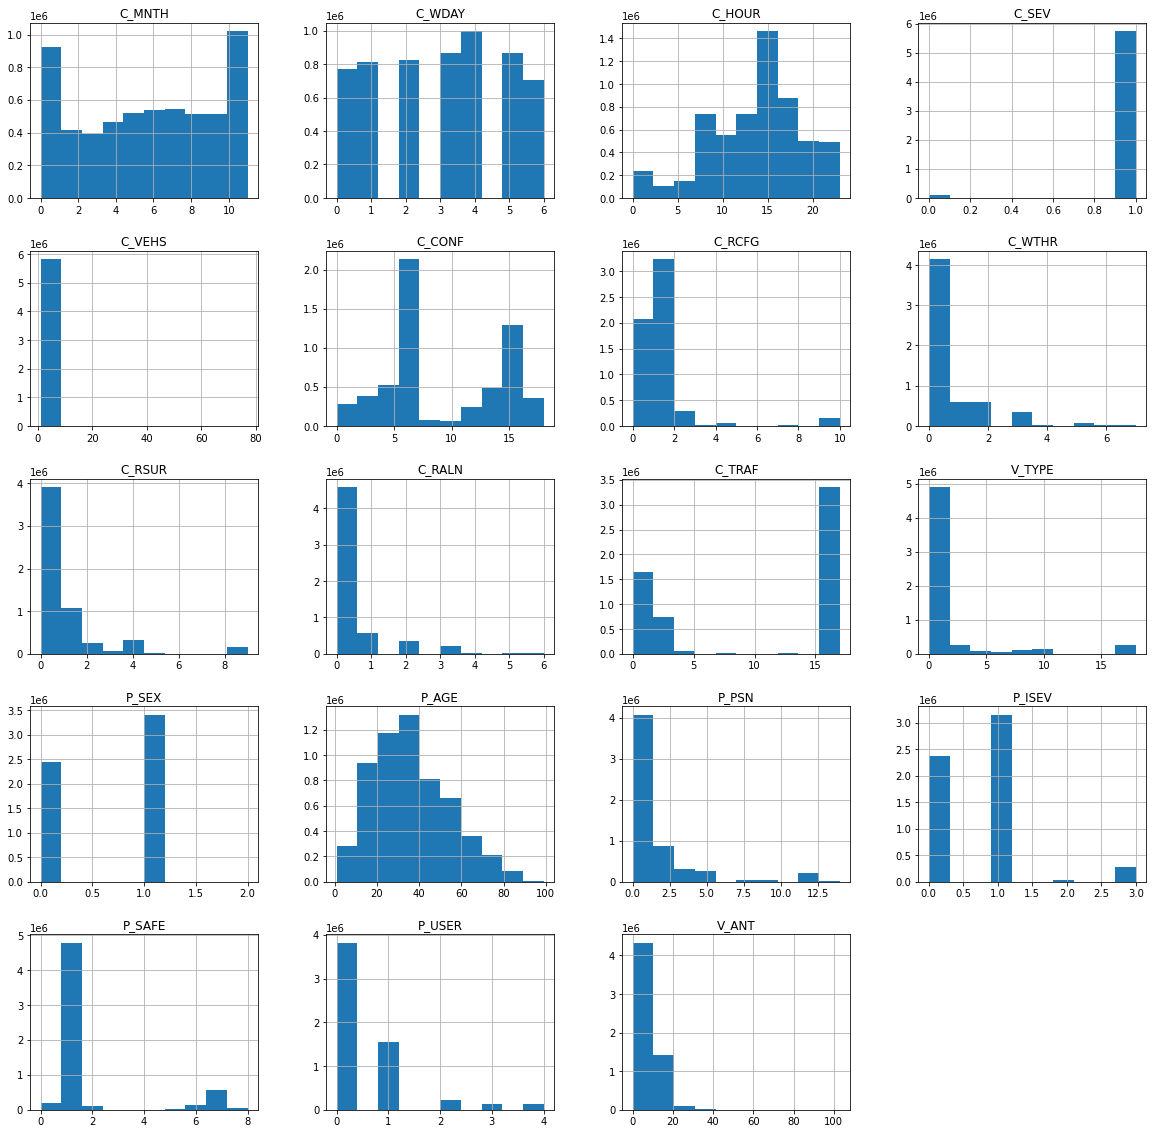

In [45]:
df.hist(figsize = (20, 20))

## Correlación entre las variables.

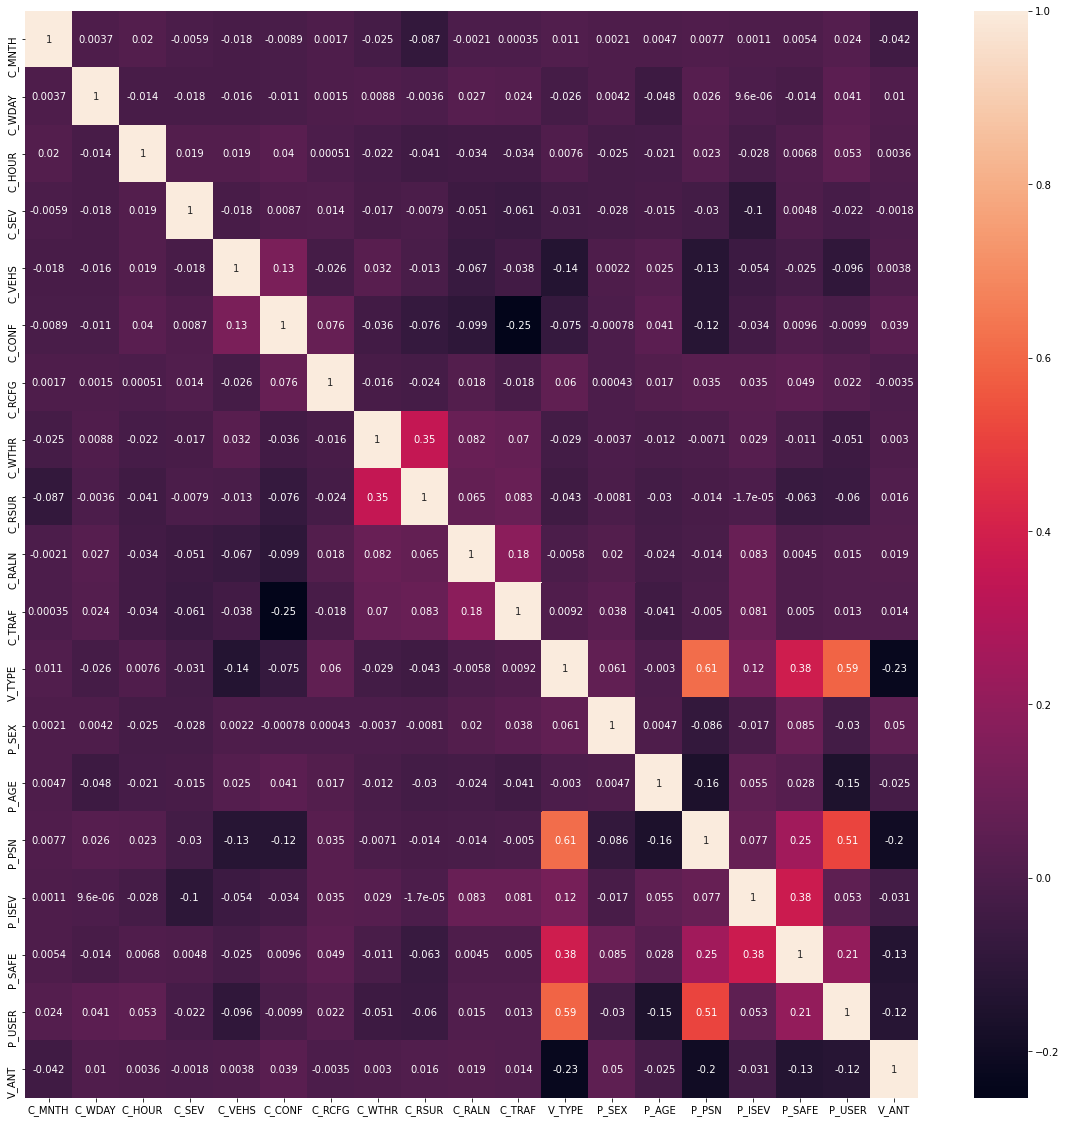

In [46]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

La mayoría de las variables presentan un bajo índice de correlación. Existen varias levemente correlacionadas y son muy pocos los casos en los que las variables que lo están altamente. Las variables con mayor correlación entre sí son 'V_TYPE', 'P_PSN' y 'P_USER' las cuales determinan respectivamente el tipo de vehículo, la posición que ocupa un idifivuo dentro del vehículo; y que tipo de usuario es cada persona en el accidente (ya sean conductor, pasajero, persona que va en bicicleta...). Que justo estas tres variables estén altamente correlacionadas tiene sentido.


Ahora vemos cuántos accidentes son mortales y cuántos no. A los no mortales se les asigna el valor 1 y a los que sí lo son el valor 0. 

In [47]:
mortalidad_posible=df['C_SEV'].unique()
mortalidad_posible # 1: no hay muertes, 0: sí hay muertes.

array([1, 0], dtype=int64)

Observamos que muchos más accidentes no mortales, lo cual es bueno. 

In [48]:
df['C_SEV'].value_counts()

1    5744075
0      98314
Name: C_SEV, dtype: int64

<AxesSubplot:>

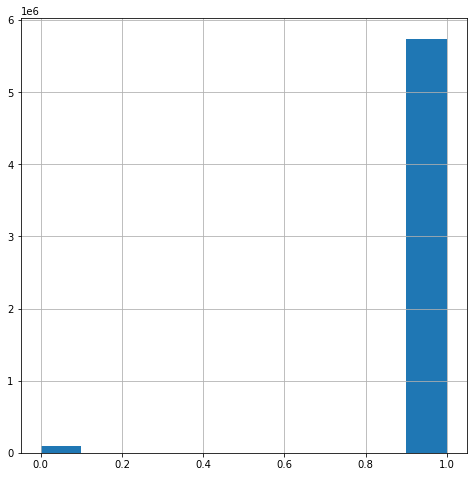

In [49]:
df['C_SEV'].hist(figsize = (8, 8)) #Vemos que el conjunto de datos está desbalanceado.

Para representar los histogramas para hacer estudios de incidencias en días de la semana o las condiciones atmosféricas (entre otros) asociamos a cada categoría su valor, para así tener las etiquetas correctamente asociadas en los histogramas.

In [139]:
w_days = df['C_WDAY']
w_days = w_days.sort_values()
w_days = w_days.replace({0:"Lunes", 1:"Martes", 2:"Miércoles", 3:"Jueves", 4:"Viernes", 5:"Sábado", 6:"Domingo" })
h_days = df['C_HOUR']
h_days = h_days.sort_values()
weath_cond = df['C_WTHR']
weath_cond = weath_cond.replace({0:"Sunny", 1: "Overcast", 2:"Raining", 3:"Snowing", 4:"Freezing Rain", 5:"Visibility limitation (snow, fog, etc..)", 6: "Strong wind", 7: "Other" })
road_cond = df['C_RSUR']
road_cond = road_cond.replace({0:"Dry, normal", 1:"Wet", 2:"Snow", 3:"Slush, wet snow", 4:"Icy", 5:"Sand/gravel/dirt", 6:"Muddy", 7:"Oil", 8:"Flooded", 9: 'Other'})
month_acc = df['C_MNTH']
month_acc = month_acc.sort_values()
month_acc = month_acc.replace({0:"ENE", 1:"FEB", 2:"MAR", 3:"ABR", 4:"MAY", 5:"JUN", 6:"JUL", 7:"AGO", 8:"SEP", 9:"OCT", 10:"NOV", 11:"DIC"})
v_type = df['V_TYPE']

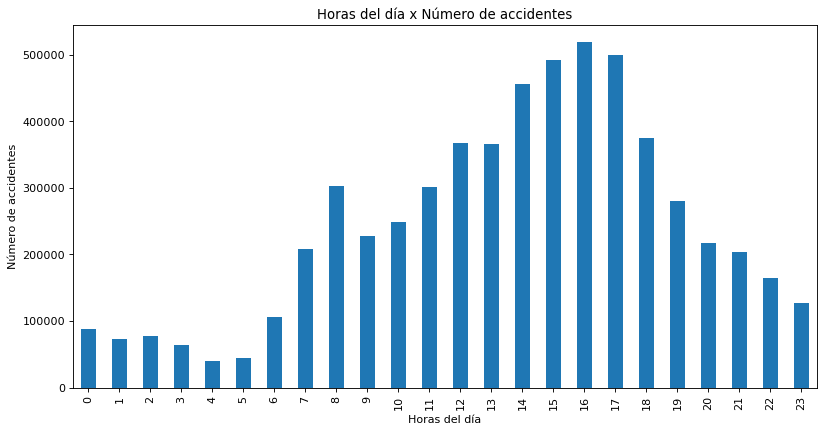

In [140]:
fig2 = plt.figure(figsize=(12, 6), dpi= 80)

ax2 = h_days.value_counts().sort_index().plot.bar()
ax2.set_xlabel("Horas del día")
ax2.set_ylabel("Número de accidentes")
plt.title("Horas del día x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto a la hora del día en el que se produce. Por ejemplo, el momento del día en el que más accidentes se producen es a las 15h y eso podría ser porque muchas personas acaban su jornada laboral y tiene más prisa por llegar a casa. Al contrario ocurre en las horas de la madrugada que es cuando menos accidentes se producen. Esta situación podría ser a la inversa los fines de semana. 

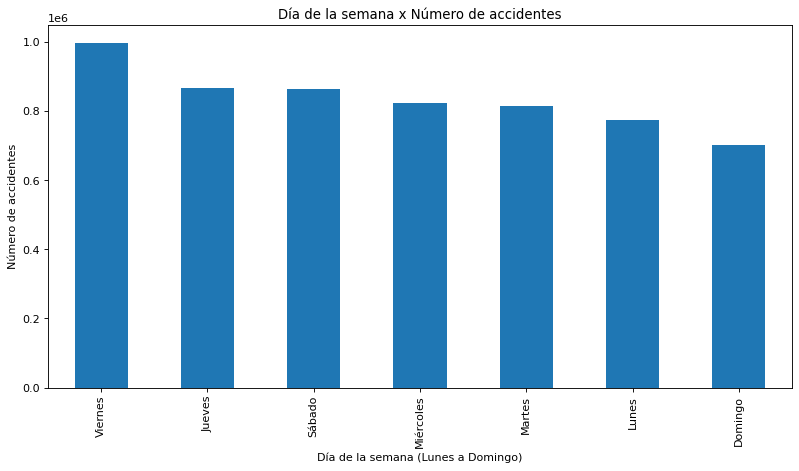

In [141]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = w_days.value_counts().plot.bar()
ax3.set_xlabel("Día de la semana (Lunes a Domingo)")
ax3.set_ylabel("Número de accidentes")
plt.title("Día de la semana x Número de accidentes")
plt.show()

En este histograma podemos ver la distribución del número de accidentes con respecto a los días de la semana. Al contrario de lo que podría pensarse, no hay una gran diferencia entre cada día de la semana. El día de la semana en el que más accidentes se producen son los viernes y el día en el que menos, los domingos.

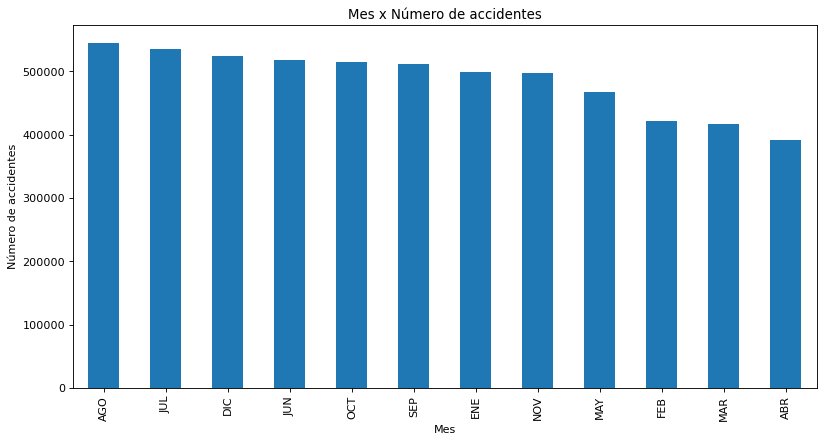

In [142]:
fig6 = plt.figure(figsize=(12, 6), dpi= 80)

ax6 = month_acc.value_counts().plot.bar()
ax6.set_xlabel("Mes")
ax6.set_ylabel("Número de accidentes")
plt.title("Mes x Número de accidentes")
plt.show()

En el anterior gráfico podemos vemos la distribución por meses del número de accidentes. Se observa que la mayor cantidad de accidentes ocurre en los meses de verano de Julio y Agosto, siendo además Junio el cuarto mes con mayor cantidad de accidentes. Por otro lado, los meses en los que menos accidentes ocurren son Marzo y Abril.

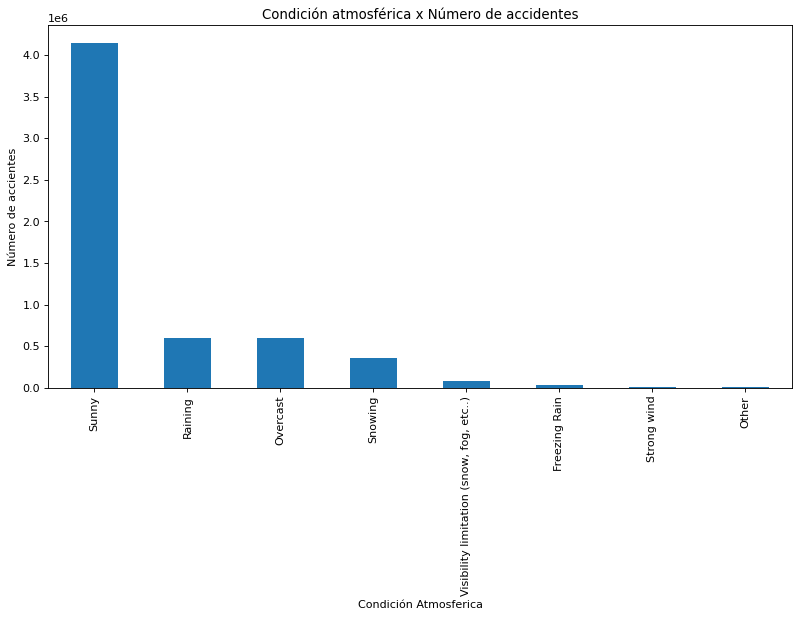

In [143]:
fig4 = plt.figure(figsize=(12, 6), dpi= 80)

ax4 = weath_cond.value_counts().plot.bar()
ax4.set_xlabel("Condición Atmosferica")
ax4.set_ylabel("Número de accientes")
plt.title("Condición atmosférica x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la distribución del número de accidentes con respecto a las diferentes condiciones atmostéricas. Vemos que el mayor número de accidentes se produce cuando está soleado y la cantidad de accidentes en este caso es mucho mayor que en el resto. Las siguientes condiciones atmosféricas con mayor número de accidentes son con lluvia, niebla y nieve. En el resto de casos el número de accidentes es bastante menor.

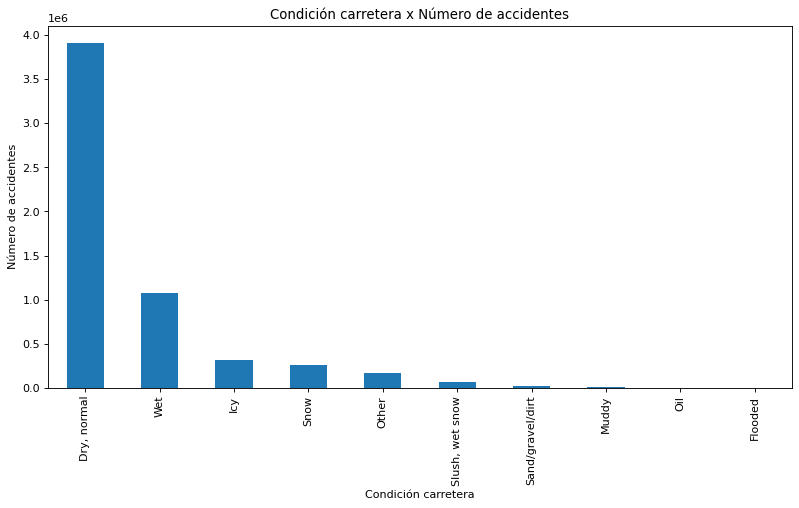

In [144]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = road_cond.value_counts().plot.bar()
ax3.set_xlabel("Condición carretera")
ax3.set_ylabel("Número de accidentes")
plt.title("Condición carretera x Número de accidentes")
plt.show()

En el anterior gráfico vemos como se distribuye el número de accidentes con respecto a la condiciones de la carretera. En este caso el mayor número de accidentes se produce cuando la carretera se presenta seca, en estado normal, con bastante diferencia del resto de condiciones. Seguidamente, las situaciones son mayor número de accidentes son las que presentan las carreteras mojadas y en menor medida, heladas y nevadas.

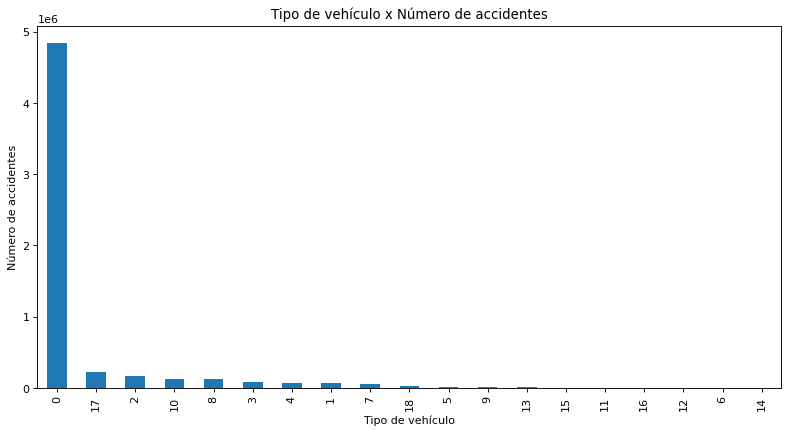

In [145]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = v_type.value_counts().plot.bar()
ax3.set_xlabel("Tipo de vehículo")
ax3.set_ylabel("Número de accidentes")
plt.title("Tipo de vehículo x Número de accidentes")
plt.show()

En este gráfico vemos la distribución de los accidentes según el tipo de vehículo. Siguiendo la leyenda de las variables, el tipo de vehículo 0 se corresponde con vehículos ligeros (coches de pasajeros). Vemos que con una gran diferencia en comparación al resto de vehículos, los vehículos ligeros son los que sufren mayor número de accidentes. Los siguientes vehículos más propensos a tener accidentes son los clasificados como 'otros', camiones y furgonetas y biciletas. Por otra parte, los menos propensos a sufrir accidentes son los tractores, pequeños autobuses escolares y camiones de bomberos.

### DATOS

Antes de comenzar a trabajar con los algoritmos es necesario terminar de preparar los datos para ellos, en este caso necesitamos balancear los datos en la variable objetivo, que será 'C_SEV' y escalar las observaciones.

Utilizamos "under_sampling" dado que es una buena forma de equilibrar conjuntos de datos desiguales manteniendo todos los datos en la clase minoritaria y disminuyendo el tamaño de la clase mayoritaria, ya que un conjunto de datos desequilibrado puede conducir a resultados sesgados. 

In [56]:
from imblearn.under_sampling import RandomUnderSampler

Filas que nos quedamos: 196628


<AxesSubplot:>

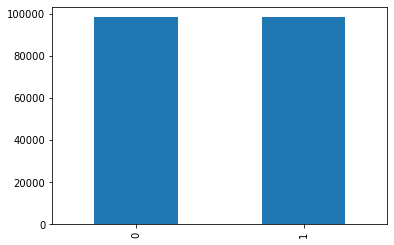

In [57]:
# hacemos undersampling para balancear la variable objetivo:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_1,y_1=rus.fit_resample(df, df[['C_SEV']].values)
print('Filas que nos quedamos:', len(rus.sample_indices_))
indicadores_undersampled = df.iloc[rus.sample_indices_]
indicadores_undersampled['C_SEV'].value_counts().plot.bar()

Una vez aplicado este método observamos que los datos aparecen balanceados. 

Separamos el conjunto de los datos en un subconjunto de entrenamiento y otro de test. Posteriormente realizamos el escalado de los datos. 

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X_1.drop('C_SEV', axis = 1).astype(float), y_1.astype(int), test_size=0.25, random_state=0, stratify=y_1)
print(X_train.shape, X_test.shape,y_train_1.shape, y_test_1.shape)

(147471, 18) (49157, 18) (147471,) (49157,)


Ahora realizamos el escalado de los datos con el conjunto de entrenamiento, para posteriormente aplicarle el mismo escalado al conjunto de test.

In [59]:
from sklearn.preprocessing import MinMaxScaler
col=list(X_train.columns)
scaler = MinMaxScaler().fit(X_train)
datos_escalados_1 = scaler.transform(X_train)
X_train_1 = pd.DataFrame(datos_escalados_1,columns=col)
X_train_1.head()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_ANT
0,0.818182,0.666667,0.608696,0.013158,0.611111,0.1,0.142857,0.444444,0.166667,0.941176,0.0,1.0,0.326531,0.000000,0.666667,0.125,0.00,0.090909
1,0.181818,0.500000,0.695652,0.026316,0.333333,0.0,0.000000,0.000000,0.166667,0.941176,0.0,1.0,0.255102,0.000000,0.000000,0.125,0.00,0.050505
2,0.181818,0.500000,0.043478,0.013158,0.888889,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.387755,0.000000,0.333333,0.125,0.00,0.040404
3,1.000000,0.666667,0.913043,0.013158,0.722222,0.1,0.142857,0.444444,0.000000,0.000000,0.0,1.0,0.244898,0.214286,0.333333,0.000,0.25,0.020202
4,0.363636,0.333333,0.521739,0.013158,0.333333,0.0,0.000000,0.000000,0.000000,0.941176,0.0,0.0,0.030612,0.428571,0.000000,0.125,0.25,0.131313


In [60]:
X_test_1 = scaler.transform(X_test)

Ya tenemos los datos escalados y preparados para los algoritmos

# ALGORITMOS DE CLASIFICACIÓN

A continuación, se entrenarán diversos algoritmos para predecir si un accidente será o no mortal, es decir predecir la variable 'C_SEV'.

In [61]:
#meter en un .py para luego llamar a las funciones.

import seaborn as sns
from matplotlib import pyplot as plt


def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()
    

# Regresión logística

La Regresión Logística Simple es un modelo de regresión que es utilizado para predecir el resultado de una variable cualitativa binaria en función de las variables independientes o predictoras.

La Regresión logística es una técnica estadística multivariante que nos permite estimar la relación existente entre una variable dependiente, en particular dicotómica y un conjunto de variables independientes. 

La variable dependiente no es continua, sino discreta (generalmente toma valores (0, 1). Las variables explicativas pueden ser cuantitativas o cualitativas y la ejecución del modelo no es una función lineal de partida, sino exponencial; si bien, por una sencilla transformación logarítmica puede finalmente presentarse como una función lineal.

Lo primero que hacemos es cross-validation para encontrar el mejor parámetro 'C' según la métrica accuracy.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-2,2,10)
param_grid = {'C': vectorC }
logreg=LogisticRegression(random_state=2,solver='liblinear')
grid = GridSearchCV(logreg,
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10,n_jobs=-1)

grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=2, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])},
             scoring='accuracy')

best mean cross-validation score: 0.709
best parameters: {'C': 100.0}


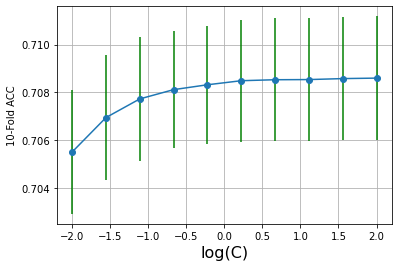

In [64]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold ACC')
plt.grid()
plt.show()

Mediante el método de la validación cruzada estimamos la habilidad del modelo en nuevos datos donde obtenemos un 72,1% de mejor resultado. 

In [65]:
Copt = grid.best_params_['C'] #nos quedamos con el mejor parámetro encontrado

Entrenamos ahora el modelo con ese parámetro encontrado.

In [66]:
reg=LogisticRegression(solver='newton-cg',C = Copt, max_iter=100)
DatosRL = reg.fit(X_train_1, y_train_1)
predRL = reg.predict(X_test_1)
prob_pred = reg.predict_proba(X_test_1)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Podemos ver la estimación de los coeficientes asociados a cada variable en la regresión.

In [67]:
reg.coef_

array([[-0.15514028, -0.36794182,  0.3313384 , -4.10641193, -0.61456661,
         0.74219458, -0.31116767,  0.1189526 , -1.32146614, -1.11927054,
        -0.73272587, -0.50798301, -0.57883762, -1.05622492, -2.91670773,
         1.5052118 ,  0.06002983, -0.57605165]])

Evaluamos nuestro modelo con el conjunto de datos de test.

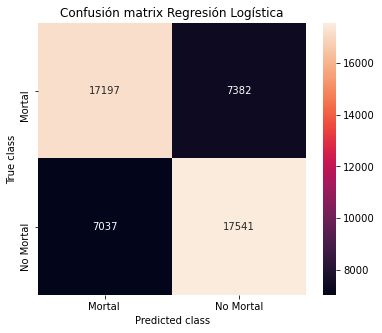

In [68]:
conf_matrix= confusion_matrix(y_test_1, predRL)
plt.figure(figsize=(6,5))
labels= ['Mortal ', 'No Mortal']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Regresión Logística')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Esta tabla describe el rendimiento del un modelo supervisado de Machine Learning en los datos de prueba donde se desconocen los verdaderos valores. Se llama "matriz de confución" porque hace que sea fácil detectar dónde es sistema está confundiendo dos clases. Esta tabla es utilizada para un problema de clasificación en el que estamos prediciendo si una persona ha tenido un accidente mortal o no.

Anteriormente hemos asignado el valor 0 a los accidentes mortales y el 1 a los no mortales.

En la cuadrícula vemos que:

    -True negative (0,0): persona que ha tenido un accidente mortal y el modelo lo clasifica como accidente mortal.

    -True positive (1,1): persona que ha tenido un accidente no mortal y el modelo lo clasifica como accidente no mortal.

    -False positive (0,1): persona que ha tenido un accidente mortal y el modelo lo clasifica como accidente no mortal.

    -False negative (1,0): persona que ha tenido un accidente no mortal y el modelo lo clasifica como accidente mortal.

Vemos que los resultados con test son: hay 17481 han sido clasificados como true negative, 17880 como true positive, 6698 false negative y 7098 false positive.

In [69]:
print('Por lo tanto nuestra tasa de acierto: ', accuracy_score(predRL, y_test_1))

Por lo tanto nuestra tasa de acierto:  0.7066745326199727


La tasa de acierto es de aproximadamente un 72%.

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, predRL))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     24579
           1       0.70      0.71      0.71     24578

    accuracy                           0.71     49157
   macro avg       0.71      0.71      0.71     49157
weighted avg       0.71      0.71      0.71     49157



Con recall (SEN) medimos la sensibilidad que se representa como la fracción de verdaderos positivos. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo, sen = tp/(tp+fn). Obtenemos un valor de 71%.

La precisión (PPV) es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos, ppv = tp/(tp+fp), tenemos una precisión de 71%.

F1-Score (FSC) es otra métrica muy empleada que nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases está desbalanceado, en nuestro caso 20-80. La fórmula es fsc = 2*(sen*ppv/(sen+ppv)). El valor que hemos obtenido es 71%.

Vemos que las métricas están muy igualadas con un 72% de precisión

Área bajo la curva:

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


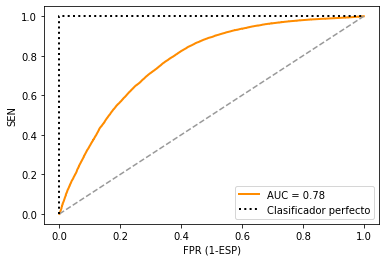

In [71]:
y_prob = reg.predict_proba(X_test_1)[:,1]
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

La curva ROC nos dice cómo de bueno es nuestro modelo a la hora de distinguir entre dos clases, en este caso los accidentes mortales y no mortales. Esta curva está definida por la sensibilidad que es la tasa de verdadero positivo y "1-ESP" es la tasa de falso positivo. La métrica de evaluación AUC se calucla como el área bajo una curva ROC y es uan representación escalar del rendimiento esperado de un clasificador. La métrica AUC mide la tasa de positivos verdaderos frente a la tasa de falsos positivos. El valor obtenido es 0.79, por lo que hay un 79% de probabilidad de qeu el modelo pueda distinguir entre clase positiva y clase negativa. Es decir, entre (mortal, mortal) y (no mortal, no mortal).

# ÁRBOLES DE DECISIÓN

Los árboles de decisión simples son estructuras similares a diagramas de flujo donde cada nodo interno representa una característica o atributo, cada rama una regla de decisión y cada nodo hoja representa el resultado. Así, las observaciones se bifurcarán por las ramas del árbol hasta llegar a la clasificación.

Los árboles de decisión son modelos predictivos formados por reglas binarias (sí/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Son utilizados para la regresión y la clasificación. Los árboles de regresión son el subtipo de árboles de predicción que se aplica cuando la variable respuesta es continua. En términos generales, en el entrenamiento de un árbol de regresión, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal.

Para construir un árbol de clasificación, se emplea el mismo método recursive binary splitting descrito en los árboles de regresión. Sin embargo, como la variable respuesta es cualitativa, no se puede emplear el RSS como criterio de selección de las divisiones óptimas.

Los árboles de decisión son una técnica de aprendizaje automático muy utilizada. Su ventajas principales son:

Son fáciles de entender y de explicar a personas que todavía no están familiarizadas con técnicas de Inteligencia Artificial, se adaptan a cualquier tipo de datos y descubren cuáles son los atributos más relevantes. También tienen sus desventajas:

No extrapolan bien fuera del rango de entrenamiento y tienen la tendencia a sobre-ajustar, sobre todo si no se regularizan.

En primer lugar vamos a estudiar la precisión obtenida por validación cruzada para distintos valores del parámetro "max_depth" (profundidad del árbol) y, así, poder decidir qué valor utilizar en nuestro modelo.

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

best mean cross-validation score: 0.806
best parameters: {'max_depth': 9}


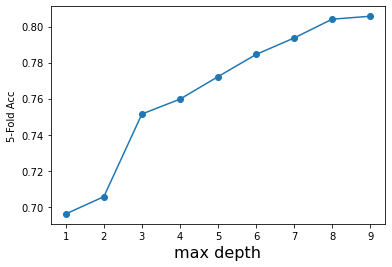

In [73]:
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_1, y_train_1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Nuestro mejor resultado es para "max_depth" = 9 con una precisión de casi un 81%.

Entrenamos el modelo con ese parámetro encontrado.

In [74]:
arbol = DecisionTreeClassifier(max_depth = 9)
arbol.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=9)

Realizamos las predicciones tanto para datos de train como de test.

In [75]:
y_pred_train = arbol.predict(X_train_1)
y_pred_test = arbol.predict(X_test_1)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Vemos las métricas de clasificación para los datos de train.

In [76]:
from sklearn import metrics

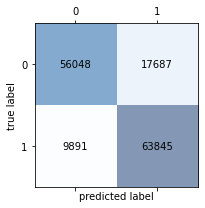

In [77]:
confmat_train = metrics.confusion_matrix(y_train_1, y_pred_train)
plot_confusion_matrix(confmat_train)

Al igual que antes vemos que el modelo funciona correctamente. Donde más valores hay es en true negative y true positive y donde menos en false negative y false positive. El mayor valor lo obtiene el true positive con 64180 datos y el menor valor el false negative con 9556 datos.

ACC:  0.8129937411423263
SEN:  0.8658592817619616
ESP:  0.7601274835559775
PPV:  0.7830667713290487
FSC:  0.8223845222454079


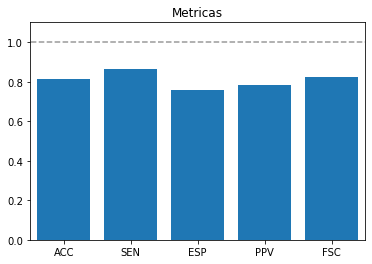

In [78]:
calcula_metricas(confmat_train)

En cuanto a las métricas del conjunto tenemos unos porcentajes muy altos de precisión. Por ejemplo, en el que más tenemos es una sensibilidad (SEN) del 87% seguido del F1-score (FSC) de aproximadamente un 83%.

Hacemos lo mismo para los datos de test.

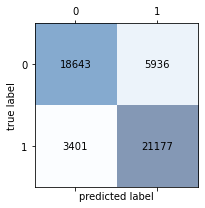

In [79]:
confmat_test = metrics.confusion_matrix(y_test_1, y_pred_test)
plot_confusion_matrix(confmat_test)

Los resultados obtenidos para los datos de test siguen el mismo patrón que los datos de train, es decir, true negative es menor que true positive y false negative es menor que false positive. Además todos son una fracción de los datos con respecto al anterior.

ACC:  0.8100575706410074
SEN:  0.8616242167792335
ESP:  0.7584930224988812
PPV:  0.7810644340353337
FSC:  0.8193689423690778


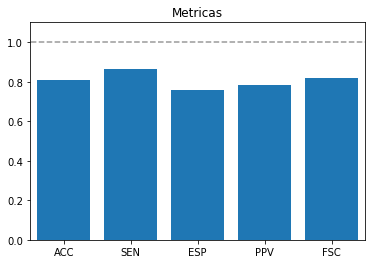

In [80]:
calcula_metricas(confmat_test)

Representamos la curva roc:

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


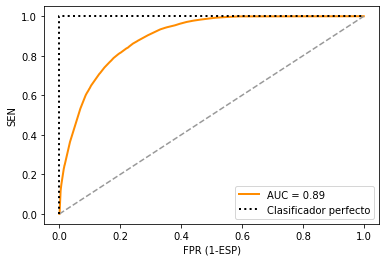

In [81]:
y_prob = arbol.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Vemos que con árboles de decisión la métrica AUC ha aumentado un 10%. 

# Random Forest

Random Forest es básicamente un algoritmo de bagging en el que se combinan diferentes árboles de decisión. Los cuales se obtienen tras un proceso de entrenamiento en el que se utiliza una muestra aleatoria diferente para cada uno de ellos. Obteniendo así una predicción diferente en cada uno de los árboles. La predicción final se obtiene mediante votación, seleccionado aquella opción que es reportada por una mayor cantidad de árboles. Esto permite obtener un modelo con una menor varianza.
Las principales ventajas de estos modelos frente a otras familias son:

-Reduce la varianza. Debido a la utilización de múltiples árboles de decisión la varianza de la predicción disminuye respecto a un solo árbol de decisión. Lo que reduce la posibilidad de obtener un modelo sobreajustado. Aún así el sesgo del modelo es el mismo que se obtiene con un solo árbol de decisión.

-No requiere la asunción de suposiciones. Cuando solamente se quiere un modelo para realizar predicciones Random Forest es una solución excelente. Esto es así porque no es necesario realizar suposiciones sobre el modelo o los conjuntos de datos.

In [82]:
from sklearn.ensemble import RandomForestClassifier

best mean cross-validation score: 0.829
best parameters: {'max_depth': 14}


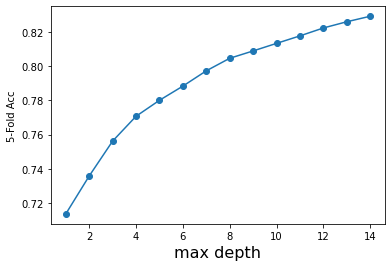

In [83]:
# grid search
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 200), scoring= 'accuracy', param_grid = param_grid, cv = 5)
grid.fit(X_train_1, y_train_1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Mediante el método de validación estimamos la habilidad del modelo en nuevos datos donde obtenemos el mejor resultado con 83% para "max_depth" = 14.

Entrenamos el modelo con el parámetro encontrado.

In [84]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 14).fit(X_train_1, y_train_1)

Realizamos predicciones para test y train:

In [85]:
y_pred_train = rf.predict(X_train_1)
y_pred_test = rf.predict(X_test_1)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluamos las distintas métricas en los datos de train.

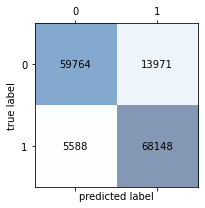

In [86]:
confmat_train = metrics.confusion_matrix(y_train_1, y_pred_train)
plot_confusion_matrix(confmat_train)

La matriz de confusión nos da: 19.049 casos clasificados como True negative, 5530 como false positive, 2806 como false negative y 21.772 como true positive. Estos resultados siguen siendo buenos ya que el modelo lo clasifica correctamente.

ACC:  0.8673705338676757
SEN:  0.924216122382554
ESP:  0.8105241744083542
PPV:  0.8298688488656706
FSC:  0.8745051490167142


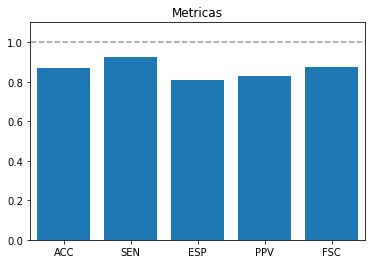

In [87]:
calcula_metricas(confmat_train)

Vemos que las métricas de sensibilidad y f1-Score vuelven a ser las más altas con un 92% y 87,4% de precisión.

Análogamente para los datos de test:

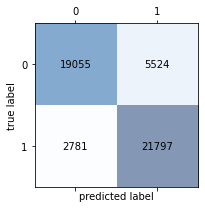

In [88]:
confmat_test = metrics.confusion_matrix(y_test_1, y_pred_test)
plot_confusion_matrix(confmat_test)

ACC:  0.831051528775149
SEN:  0.8868500284807551
ESP:  0.7752552992391879
PPV:  0.7978112074960653
FSC:  0.839977648894969


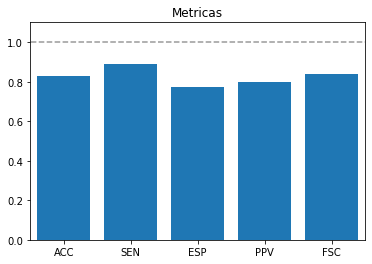

In [89]:
calcula_metricas(confmat_test)

Por último, representamos la curva roc.

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


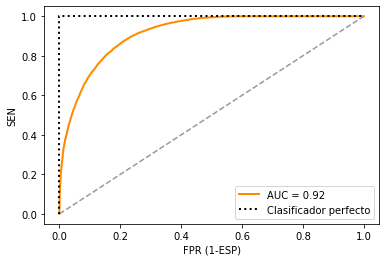

In [90]:
y_prob = rf.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Respecto a los árboles de decisión la métrica AUC ha aumentado un 3%, con un 92%.

# KNN

El método de los k vecinos más cercanos es un algoritmo de Machine Learning que pertenece a los algoritmos de aprendizaje
supervisado más simples y fáciles de aplicar. 

Es un método es muy utilizado para resolver problemas de clasificación y de regresión que busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean  

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features (las columnas).

In [91]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [92]:
# Vamos a estudiar qué valor del hiperpárametro k es el mejor analizando la precisión obtenida para cada valor de k:

ks = list(range(1, 11)) #Creamos una lista con los valores 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

# Creamos un diccionario en el que iremos recogiendo las accuracies (precisión) de las predicciones con los diferentes k´s
accuracies = {}
for k in ks:
    # Definimos el modelo con el valor de hiperparámetro correspondiente
    knn = KNeighborsClassifier(n_neighbors=k)
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train_1, y_train_1)
    # Hacemos predicciones sobre los datos de test
    y_pred_test = knn.predict(X_test_1)
    # Evaluamos y guardamos la accuracy de cada uno
    acc = metrics.accuracy_score(y_test_1, y_pred_test)
    accuracies[k] = acc

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWa

In [93]:
accuracies

{1: 0.7632890534410155,
 2: 0.7347478487295808,
 3: 0.7785056044917306,
 4: 0.7684154850784222,
 5: 0.7826148869947311,
 6: 0.7795024106434485,
 7: 0.7864800537054742,
 8: 0.7842016396444047,
 9: 0.7874565168745041,
 10: 0.7845678133327909}

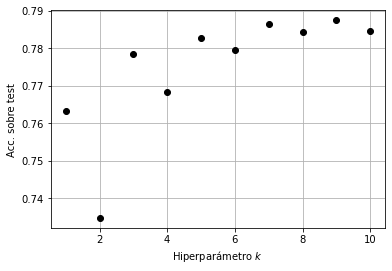

In [94]:
ks_arr = np.fromiter(accuracies.keys(), dtype=int)
accs_arr = np.fromiter(accuracies.values(), dtype=float)

plt.plot(ks_arr, accs_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

El mejor resultado se ha obtenido para k=10 con una precisión de más de 0,78.

Definimos el modelo:

In [95]:
knn = KNeighborsClassifier(n_neighbors=10)

Entrenamos el modelo:

In [96]:
knn.fit(X_train_1, y_train_1)

KNeighborsClassifier(n_neighbors=10)

Realizamos una predicción.

In [97]:
y_pred_train=knn.predict(X_train_1)
y_pred_test=knn.predict(X_test_1)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


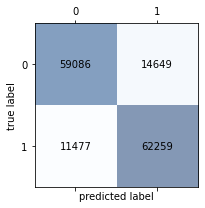

In [99]:
# Matriz de confusión conjunto de entrenamiento:
confmat_train = metrics.confusion_matrix(y_train_1,y_pred_train)
f_aux.plot_confusion_matrix(confmat_train)

Los resultados para la metriz de entrenamiento son para: true negative con 19927 y true positive con 20689. Respecto el algoritmo anterior ha aumentado el false negative con más de 2000 casos.

ACC:  0.8228397447633772
SEN:  0.8443501139199305
ESP:  0.8013290838814674
PPV:  0.809525667030738
FSC:  0.8265712540824727


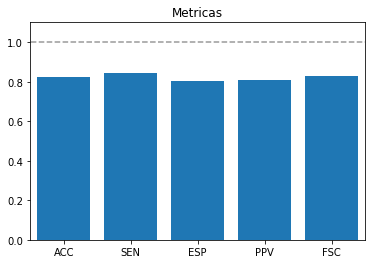

In [100]:
# Métricas conjunto de entrenamiento:
f_aux.calcula_metricas(confmat_train)

Las métricas del entrenamiento siguen el mismo patrón aunque hayan disminuido un poco. Con este algoritmo todas las métricas están muy igualadas.

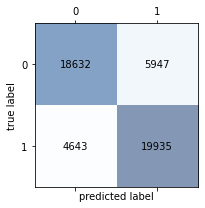

In [101]:
# Matriz de confusión conjunto de test:
confmat_test = metrics.confusion_matrix(y_test_1,y_pred_test)
f_aux.plot_confusion_matrix(confmat_test)

ACC:  0.7845678133327909
SEN:  0.8110912197900562
ESP:  0.75804548598397
PPV:  0.7702264121783479
FSC:  0.7901307966706301


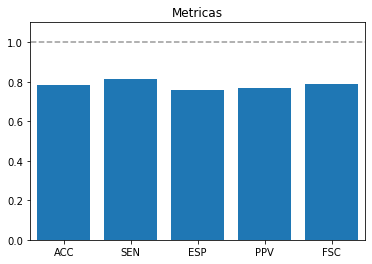

In [102]:
# Métricas conjunto de test:
f_aux.calcula_metricas(confmat_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


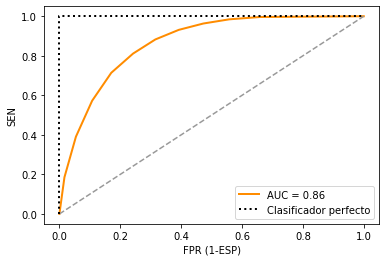

In [104]:
y_prob = knn.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Tenemos un 86% de acierto con la métrica AUC.

# GRADIENT BOOSTING

El modelo Gradient Boosting se basa en una combinación de modelos predictivos débiles (generalmente árboles de decisión) para crear modelos predictivos fuertes. Puede utilizarse tanto para clasificación como para regresión.

Los árboles de decisiones débiles se generan secuencialmente y cada árbol se crea de forma que corrige los errores del árbol anterior. Los aprendices suelen ser árboles "poco profundos", generalmente de solo uno, dos o tres niveles de profundidad.

Uno de los parámetros es la tasa de aprendizaje, que controla el grado de mejora de un árbol respecto del anterior. Una tasa de aprendizaje pequeña supone una mejora más lenta pero adaptándose mejor a los datos, lo que se traduce generalmente en mejoras en el resultado a costa de un mayor consumo de recursos.

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
classifiers = [
    GradientBoostingClassifier()
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_1, y_train_1)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_1, y_test_1))

RandomForestClassifier()


C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


model score: 0.845
GradientBoostingClassifier()
model score: 0.814


C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Obtenemos una tasa de acierto del 81,3% para el GradientBoosting.

In [107]:
# Gradient boosting

clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)
clf.fit(X_train_1,y_train_1)

      Iter       Train Loss   Remaining Time 
         1           1.3107           45.55s
         2           1.2497           41.30s
         3           1.1990           42.78s
         4           1.1514           43.30s
         5           1.1097           44.10s
         6           1.0744           44.93s
         7           1.0437           46.38s
         8           1.0151           46.47s
         9           0.9920           46.64s
        10           0.9698           47.96s
        20           0.8507           47.94s
        30           0.8007           45.51s
        40           0.7776           40.52s
        50           0.7641           35.46s
        60           0.7555           31.25s
        70           0.7490           27.00s
        80           0.7446           22.52s
        90           0.7406           18.05s
       100           0.7366           13.56s


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=130, random_state=2408, verbose=1)

Entrenamos el modelo:

In [108]:
clf.fit(X_train_1, y_train_1)

      Iter       Train Loss   Remaining Time 
         1           1.3107           48.73s
         2           1.2497           46.61s
         3           1.1990           44.43s
         4           1.1514           47.50s
         5           1.1097           46.21s
         6           1.0744           46.46s
         7           1.0437           46.98s
         8           1.0151           46.76s
         9           0.9920           46.14s
        10           0.9698           46.99s
        20           0.8507           45.80s
        30           0.8007           45.12s
        40           0.7776           43.24s
        50           0.7641           39.24s
        60           0.7555           35.19s
        70           0.7490           31.10s
        80           0.7446           26.26s
        90           0.7406           21.15s
       100           0.7366           15.78s


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=130, random_state=2408, verbose=1)

Realizamos una predicción.

In [109]:
y_pred_train=clf.predict(X_train_1)
y_pred_test=clf.predict(X_test_1)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Matriz de confusión conjunto de entrenamiento:

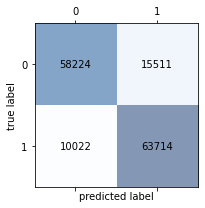

In [110]:
confmat_train = metrics.confusion_matrix(y_train_1,y_pred_train)
f_aux.plot_confusion_matrix(confmat_train)

Métricas conjunto de entrenamiento:

ACC:  0.826860874341396
SEN:  0.8640826733210372
ESP:  0.7896385705567234
PPV:  0.8042158409592931
FSC:  0.8330750975738912


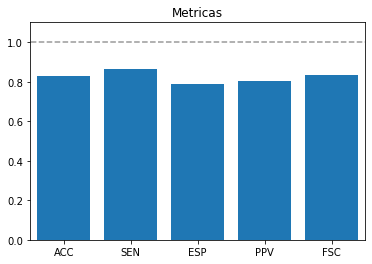

In [111]:
f_aux.calcula_metricas(confmat_train)

Matriz de confusión conjunto de test:

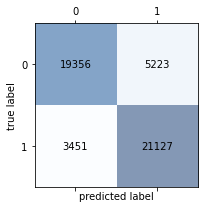

In [112]:
confmat_test = metrics.confusion_matrix(y_test_1,y_pred_test)
f_aux.plot_confusion_matrix(confmat_test)

Métricas conjunto de test.

ACC:  0.8235449681632321
SEN:  0.859589877125885
ESP:  0.7875015256926645
PPV:  0.8017836812144212
FSC:  0.8296811184417215


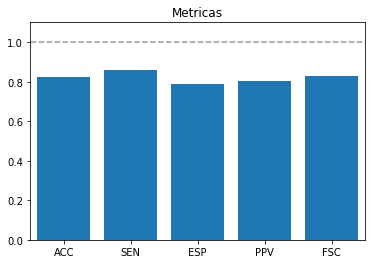

In [113]:
f_aux.calcula_metricas(confmat_test)

Área bajo la curva:

C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


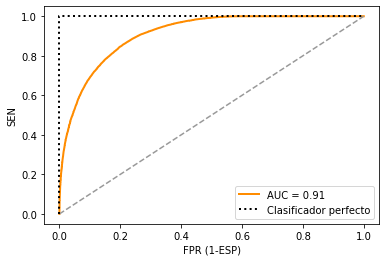

In [114]:
y_prob = clf.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

# Red Neuronal

Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. 

Para hacer una buena red neuronal se han de tener en consideración bastantes parámetros, algunos de los más importantes son:

- Número y tamaño de capas:

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.

- Learning rate:

El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza . Este hiperparametro indica que tan largo sera el camino que tome el algoritmo de optimización. Si el valor es muy pequeño la actualización se puede quedar atrapada en un minimo local.  Por otro lado si los valores son muy altos la actualización puede pasarse del punto perfecto que sería el minimo global y nunca encontrarlo 

Comenzamos con un red neuronal con 0 capas ocultas:

In [117]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=064574c0afe5b9429eb466441813b976d189213b7b3812b274048d44e7b4a9e7
  Stored in directory: c:\users\marti\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [118]:
import tensorflow as tf

In [134]:
capa = tf.keras.layers.Dense(units = 1, input_shape=[18])
neural = tf.keras.Sequential([capa])
neural.compile(
  optimizer=tf.keras.optimizers.Adamax(0.1),
  loss="mean_squared_error"
)

In [135]:
historico = neural.fit(X_train_1, y_train_1, epochs=100, verbose=False)

Vemos que a partir de un cierto punto, no mejora la red neuronal dado que hemos obtenido los pesos óptimos. 

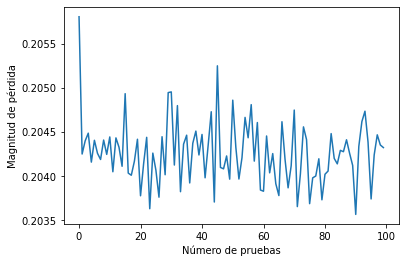

In [136]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

In [137]:
predNN_0 = neural.predict(X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNN_0)))

# mas cerca 1 mejor
print('Variance score: %.2f' % r2_score(y_test_1, predNN_0))

1537/1537 [==============================] - 3s 2ms/step
Root Mean squared error: 0.45
Variance score: 0.17


Es la más simple, así que es normal que salgan cosas bajas, vamos a probar que pasaría si ponemos más iteraciones.
<!--  -->

In [ ]:
historico = neural.fit(X_train_1, y_train_1, epochs=1000, verbose=False)

In [ ]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

Observamos que no cambia el resultado.

In [ ]:
predNN_0_1000 = neural.predict(X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNN_0_1000)))

# mas cerca 1 mejor
print('Variance score: %.2f' % r2_score(y_test_1, predNN_0_1000))

Ahora procedemos con una o más capas ocultas:

In [ ]:
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Pipeline que definirá el modelo
# ==============================================================================
pipe = Pipeline([('modelo', MLPRegressor(solver = 'adam', max_iter= 1000))])

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 200,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 6, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train_1, y =y_train_1)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

In [ ]:
neural_final = grid.best_estimator_
neural_final['modelo'].get_params()

In [ ]:
predNNML = neural_final.predict(X = X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNNML)))

# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(y_test_1, predNNML))

# Conclusiones

En un principio teníamos los datos desbalanceados y este problema puede influir en el rendimiento de nuestros algoritmos, por lo que hemos utilizado la técnica que hemos utlizado para este desequilibrio de datos ha sido más útil: el undersampling. Este desequilibrio puede ignorar por completo a la clase minoritaria y esta clase a menudo es la que más interesa. Al construir un clasificador para clasificar los accidentes mortales y no mortales a partir de nuestros algortimos y métricas, es probable que los datos contengan mas accidentes no mortales que mortales, ya que sería preocupante si fuera al revés. Tal y como hemos visto al inicio, nuestros datos efectivamente presentaban gran cantidad de accidentes sin muertes frente a los accidentes mortales y por eso realizamos el undersampling para balancear los datos y tener ambas clases igualadas.

Una vez tenemos los datos balanceados, la métrica más importante de clasificación será Accuracy ya que representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos, donde hay la misma cantidad de valores de cada etiqueta, tanto 1 como 0, que son los accidentes mortales que el modelo ha clasificado como mortales y los accidentes no mortales que el modelo ha clasificado como no mortales. Vemos en la matriz de confusión como estos valores ocupan casi todos los datos del conjunto. Esta métrica muestra que nuestros modelos son bastante buenos, pues se obtiene alrededor de un 90% de acierto en nuestros modelos.

Para evaluar la calidad de nuestros modelos como regresión logística o árboles de decisión hemos recurrido a las métricas como f1 score o recall y dado que tenemos unos porcentajes muy altos en todos los modelos para las métricas, de un 90%, concluimos que nuestro modelo funciona correctamente, es decir el modelo tiene un alto rendimiento, es decir, cuantifica la calidad de las predicciones que ofrece. Además, para el modelo de detección de accidentes mortales o no mortales nos interesa que la métrica tenga una alta sensibilidad pero también nos interesa que tenga un buena valor de precisión, puesto que los datos están balanceados, por lo que F1.score sería también una opción buena.

Las matrices de confusión siguen el mismo patrón en todos los algoritmos considerados, es decir, habrá más valores en true positive y true negative que en false positive y false negative. Con respecto a las métricas en todos los algoritmos ocurre lo mismo: la métrica SEN es la que obtiene un mayor valor, seguida de la F1-score. En particular, en el algoritmo KNN todas ellas salen muy igualadas y con una diferencia muy pequeña. Finalmente, respecto a la curva ROC, los valores ordenados de mayor a menor serían Random Forest, seguido de GradientBoosting, Árboles de decisión, KNN y Regresión Logística.